In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from tqdm import tqdm_notebook
from dask.diagnostics import ProgressBar
from matplotlib import gridspec

netcdf_index loaded.


In [3]:
with ProgressBar():
    PV = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'vert_pv', n=6, time_units = 'days since 0001-01-01').sel(yt_ocean=slice(25,75)).sel(st_ocean=slice(0,1500)).groupby('time.season').mean('time').compute()
    mld = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean_month.nc', 'mld', n=6,time_units = 'days since 0001-01-01').sel(yt_ocean=slice(25,75)).groupby('time.season').mean('time').compute()
    #pot_rho_0 = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'pot_rho_0', n=20, time_units = 'days since 0001-01-01').sel(yt_ocean=slice(-75,-25)).sel(st_ocean=slice(0,2500)).groupby('time.season').mean('time').compute()
    pot_rho_2 = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'pot_rho_2', n=6, time_units = 'days since 0001-01-01').sel(yt_ocean=slice(25,75)).sel(st_ocean=slice(0,1500)).groupby('time.season').mean('time').compute()
    #vent_age = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'age_global', n=6, time_units = 'days since 0001-01-01').sel(yt_ocean=slice(-75,-25)).sel(st_ocean=slice(0,2500)).groupby('time.season').mean('time').compute()
    #v = cc.get_nc_variable('01deg_jra55v13_iaf', 'ocean.nc', 'v', n=6, time_units = 'days since 0001-01-01').sel(yu_ocean=slice(-75,-25)).sel(st_ocean=slice(0,2500)).groupby('time.season').mean('time').compute()

[                                        ] | 0% Completed |  1.2s

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  2min 19.3s


[###                                     ] | 7% Completed |  0.4s

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  4.2s


[                                        ] | 0% Completed |  1.1s

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed |  1min 47.7s


In [8]:
PV

<xarray.DataArray 'vert_pv' (season: 4, st_ocean: 51, yt_ocean: 842, xt_ocean: 3600)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]],


       ...,


       [[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 1.333e+03 1.453e+03
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 25.02 25.11 25.2 25.29 ... 74.9 74.94 74.98
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'

Text(0.5,0,'Latitude')

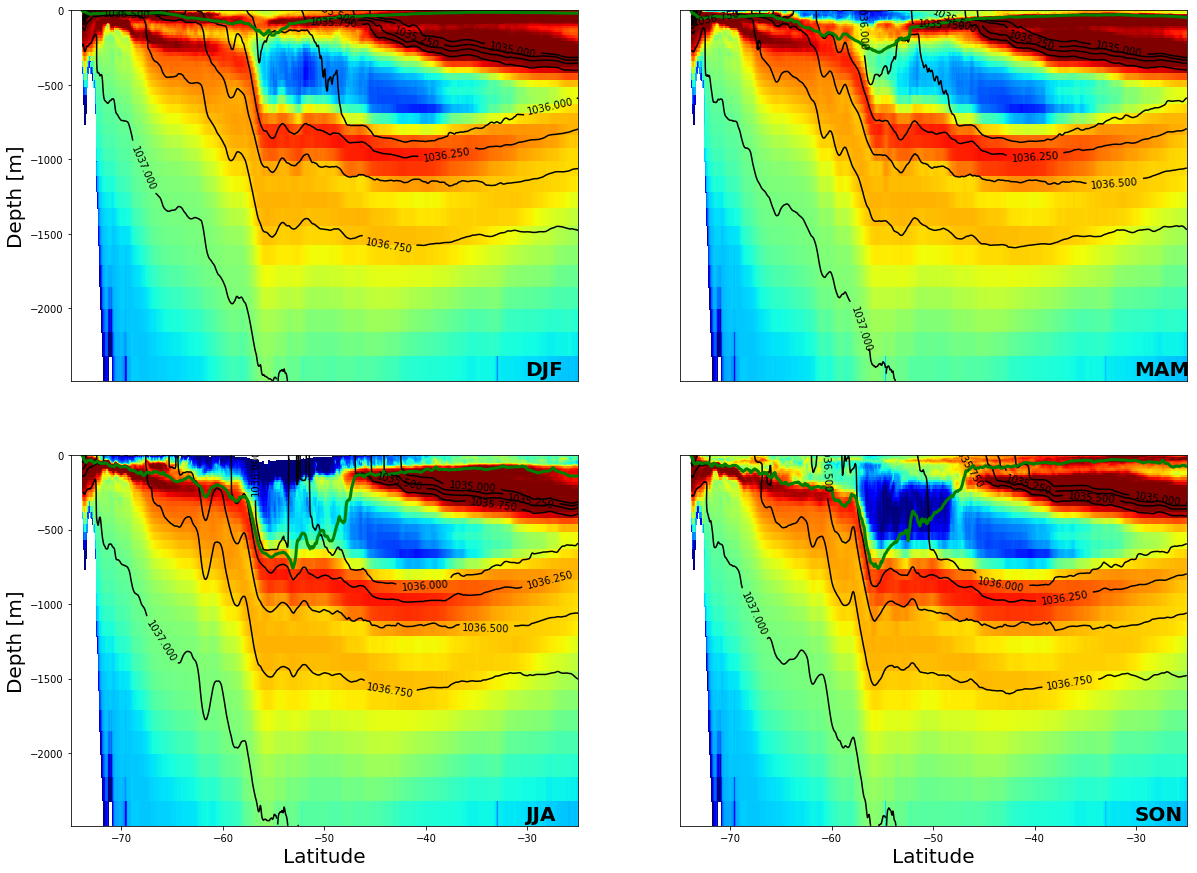

In [21]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,2,1)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='DJF').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='DJF').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,2)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='MAM').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='MAM').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='MAM').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off', left='off', labelleft='off')
plt.text(-30.2, -2450, 'MAM',color='k',fontsize=20,fontweight='bold')

plt.subplot(2,2,3)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='JJA').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='JJA').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='JJA').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.text(-30.2, -2450, 'JJA',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,4)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='SON').sel(xt_ocean=-120.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='SON').sel(xt_ocean=-120.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='SON').sel(xt_ocean=-120.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', left='off', labelleft='off')
plt.text(-30.2, -2450, 'SON',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Latitude')

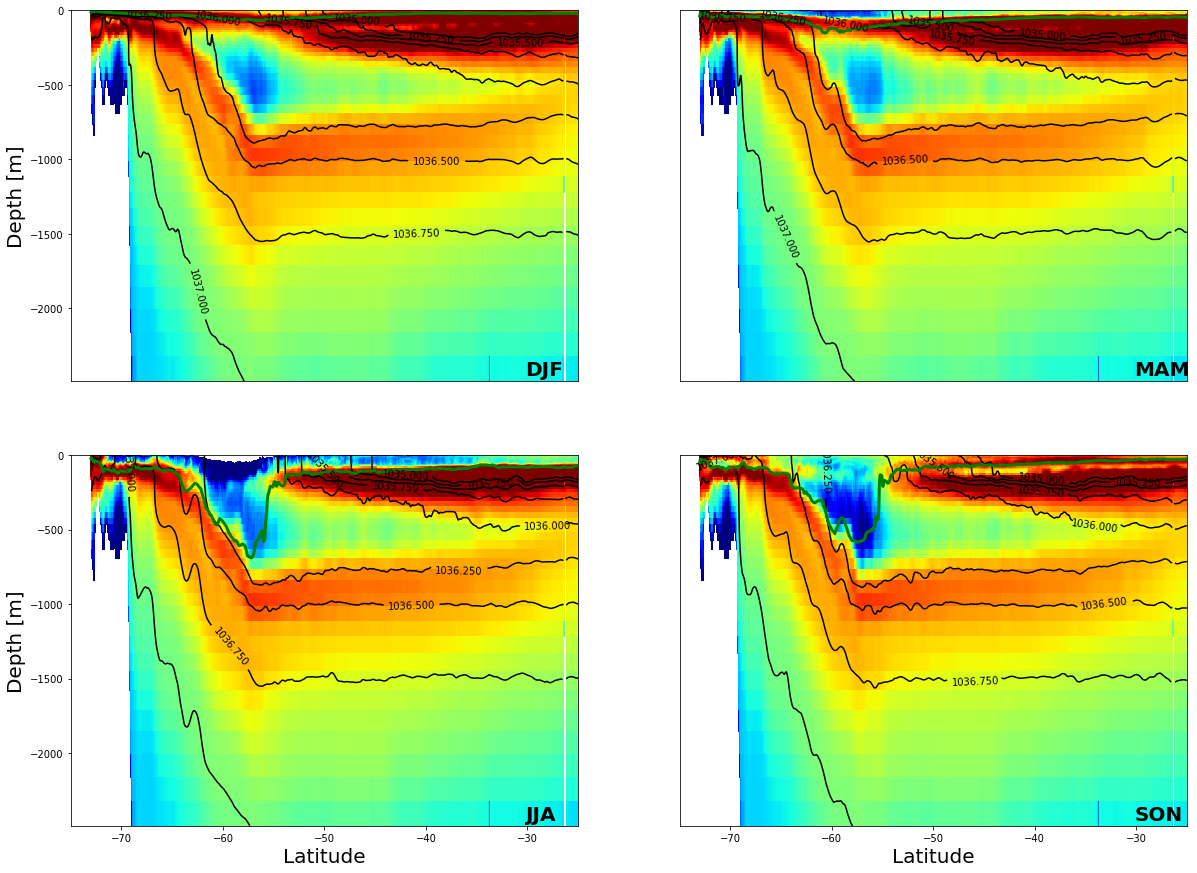

In [15]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,2,1)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='DJF').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='DJF').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,2)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='MAM').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='MAM').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='MAM').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off', left='off', labelleft='off')
plt.text(-30.2, -2450, 'MAM',color='k',fontsize=20,fontweight='bold')

plt.subplot(2,2,3)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='JJA').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='JJA').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='JJA').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.text(-30.2, -2450, 'JJA',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,4)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='SON').sel(xt_ocean=-80.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='SON').sel(xt_ocean=-80.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='SON').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', left='off', labelleft='off')
plt.text(-30.2, -2450, 'SON',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/xarray/core/computation.py:561: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


Text(0.5,0,'Latitude')

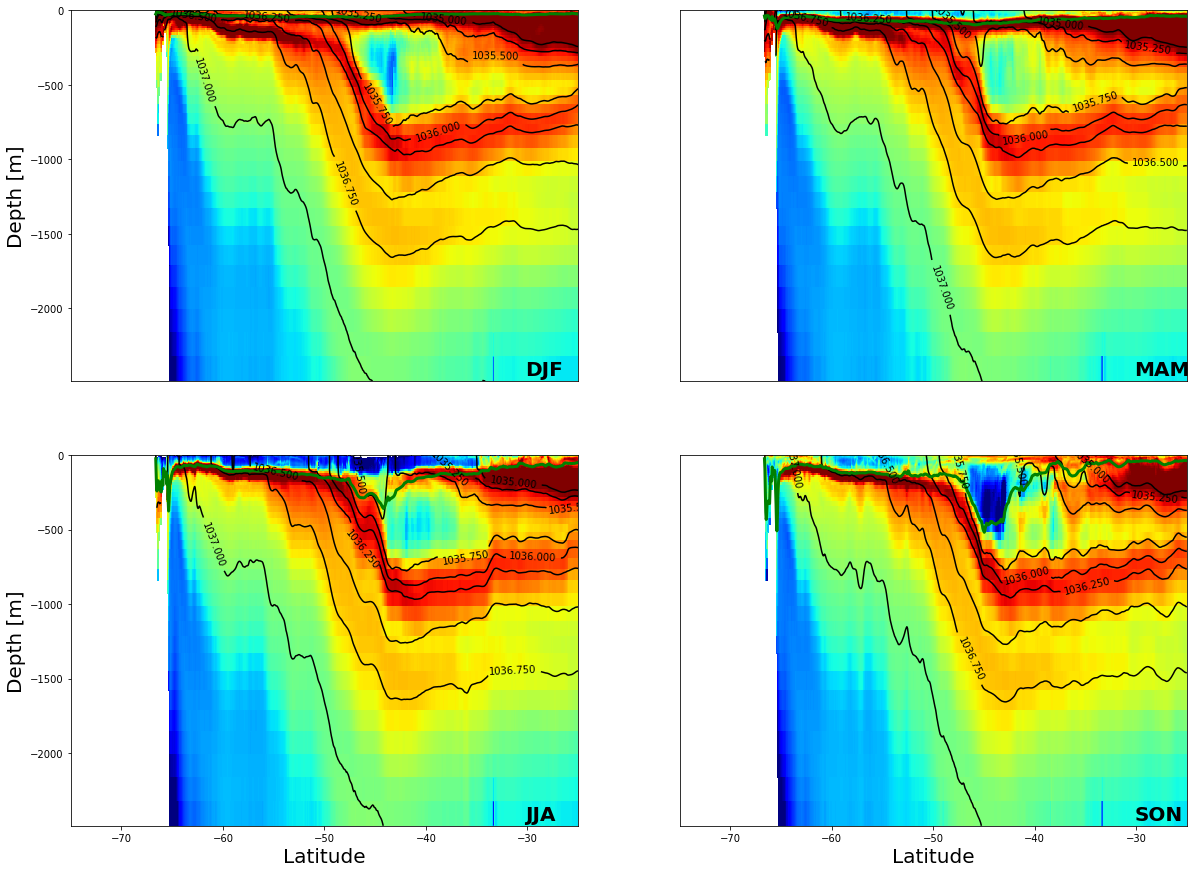

In [4]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 2)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,2,1)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='DJF').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='DJF').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,2)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='MAM').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='MAM').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='MAM').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off', left='off', labelleft='off')
plt.text(-30.2, -2450, 'MAM',color='k',fontsize=20,fontweight='bold')

plt.subplot(2,2,3)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='JJA').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='JJA').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='JJA').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.text(-30.2, -2450, 'JJA',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)
plt.ylabel('Depth [m]',fontsize=20)

plt.subplot(2,2,4)
plt.pcolormesh(PV.yt_ocean,-PV.st_ocean,np.log10(-PV.sel(season='SON').sel(xt_ocean=-250.,method='nearest')),cmap='jet')
plt.clim(-11,-8.5)
CS=plt.contour(pot_rho_2.yt_ocean,-pot_rho_2.st_ocean,pot_rho_2.sel(season='SON').sel(xt_ocean=-250.,method='nearest'),levels=[1035,1035.25,1035.5,1035.75,1036,1036.25,1036.5,1036.75,1037],colors='k')
plt.clabel(CS)
plt.plot(mld.yt_ocean,-mld.sel(season='SON').sel(xt_ocean=-250.,method='nearest'),'g',linewidth=3)
plt.tick_params(axis='both', which='both', left='off', labelleft='off')
plt.text(-30.2, -2450, 'SON',color='k',fontsize=20,fontweight='bold')
plt.xlabel('Latitude',fontsize=20)

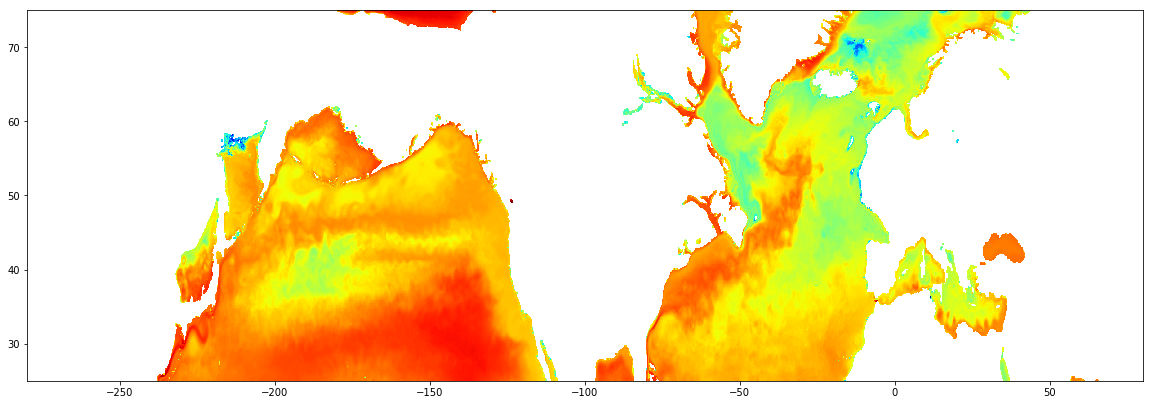

In [12]:
plt.figure(figsize=(20,15))
gs = gridspec.GridSpec(2, 1)#, width_ratios=[1, 1, 1, 1]) 
gs.update(wspace=0.002, hspace=0.002)

plt.subplot(2,1,1)
plt.pcolormesh(PV.xt_ocean,PV.yt_ocean,np.log10(PV.sel(st_ocean=200.,method='nearest').mean('season')),cmap='jet')
#plt.clim(-11,-8.5)
#plt.ylim(-65,-35)
#CS=plt.contour(vent_age.xt_ocean,vent_age.yt_ocean,vent_age.sel(season='DJF').sel(st_ocean=500.,method='nearest'),levels=[5,20,38],colors='k')

#plt.subplot(2,1,2)
#plt.pcolormesh(vent_age.xt_ocean,vent_age.yt_ocean,vent_age.sel(season='DJF').sel(st_ocean=450.,method='nearest'),cmap='jet')
#plt.clim(0,50)
#plt.clabel(CS)
#plt.plot(mld.yt_ocean,-mld.sel(season='DJF').sel(xt_ocean=-80.,method='nearest'),'g',linewidth=3)
#plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off')
#plt.text(-30.2, -2450, 'DJF',color='k',fontsize=20,fontweight='bold')
#plt.ylabel('Depth [m]',fontsize=20)


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


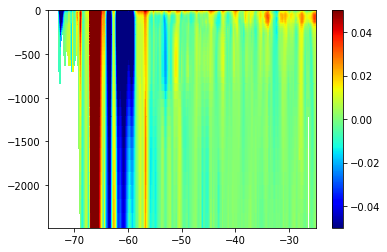

In [39]:
plt.pcolormesh(v.yu_ocean,-v.st_ocean,v.sel(xu_ocean=-80.,method='nearest').mean('season'),cmap='jet')
plt.colorbar()
plt.clim(-0.05,0.05)

In [27]:
v

<xarray.DataArray 'v' (season: 4, st_ocean: 58, yu_ocean: 841, xu_ocean: 3600)>
array([[[[      nan, ...,       nan],
         ...,
         [-0.0475  , ..., -0.044534]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [-0.004391, ..., -0.000719]]],


       ...,


       [[[      nan, ...,       nan],
         ...,
         [ 0.001248, ..., -0.029557]],

        ...,

        [[      nan, ...,       nan],
         ...,
         [ 0.001593, ...,  0.00507 ]]]], dtype=float32)
Coordinates:
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 2.323e+03 2.489e+03
  * yu_ocean  (yu_ocean) float64 -74.96 -74.92 -74.88 ... -25.24 -25.15 -25.06
  * xu_ocean  (xu_ocean) float64 -279.9 -279.8 -279.7 -279.6 ... 79.8 79.9 80.0
  * season    (season) object 'DJF' 'JJA' 'MAM' 'SON'